# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du [Cours TAL](https://cyberlearn.hes-so.ch/course/view.php?id=14966) est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3.7 ou 3.8](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais (1b et 1c), puis en français (1d).

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Pour utiliser NLTK en Python (y compris dans un _notebook_ Jupyter), vous pouvez écrire `import nltk`, puis accéder à toutes les commandes avec le préfixe `nltk.`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements qui peut être invoqué depuis un interpréteur Python en ligne de commande (écrire `python3` en ligne de commande) avec les deux commandes `import nltk` puis `nltk.download()`.  Cela vous permettra de télécharger de nombreux corpus _additionnels_ (i.e. collections de textes), mais que nous n'utiliserons pas en laboratoire.

In [113]:
import nltk

sentence1=  ['This', 'is', 'a', 'random', 'sentence', 'I', 'just', 'put', 'together']
len(sentence1)


9

Écrivez une phrase en anglais (liste de mots / string) que vous appelerez `sentence1`.  

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, trier les bi-grammes par ordre alphabétique et afficher le résultat.

In [114]:
# Please write your Python code in this cell and execute it.
bigrams= list(nltk.bigrams(sentence1))
bigrams.sort()
print (bigrams)


[('I', 'just'), ('This', 'is'), ('a', 'random'), ('is', 'a'), ('just', 'put'), ('put', 'together'), ('random', 'sentence'), ('sentence', 'I')]


Défnissez une chaîne appelée `string2` contenant une phrase.  Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [115]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goturak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [116]:
# Please write your Python code in this cell and execute it.
string2 ="Would you look at this amazing new sentence mate!"
tokens = nltk.word_tokenize(string2)
print (tokens)

['Would', 'you', 'look', 'at', 'this', 'amazing', 'new', 'sentence', 'mate', '!']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stocker le contenu dans une chaîne.

In [117]:
from urllib import request
url="http://www.gutenberg.org/cache/epub/514/pg514.txt"
response = request.urlopen(url)

raw = response.read().decode('utf8')
print(raw)

d am
thirty.  We never shall be rich, and Plumfield may burn up any night,
for that incorrigible Tommy Bangs will smoke sweet-fern cigars under
the bed-clothes, though he's set himself afire three times already.
But in spite of these unromantic facts, I have nothing to complain of,
and never was so jolly in my life.  Excuse the remark, but living among
boys, I can't help using their expressions now and then."

"Yes, Jo, I think your harvest will be a good one," began Mrs. March,
frightening away a big black cricket that was staring Teddy out of
countenance.

"Not half so good as yours, Mother.  Here it is, and we never can thank
you enough for the patient sowing and reaping you have done," cried Jo,
with the loving impetuosity which she never would outgrow.

"I hope there will be more wheat and fewer tares every year," said Amy
softly.

"A large sheaf, but I know there's room in your heart for it, Marmee
dear," added Meg's tender voice.

Touched to the heart, Mrs. March could only stre

En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder le texte principal.  Vous pouvez utiiser la notation dite de *slicing* en Python, ou identifier les chaînes où commence et finit le véritable texte.  Quelle est la longueur de ce texte en caractères ?  (Lien utile : [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).)

In [118]:
firstStars=raw.find("***")
start= raw.find("***",firstStars+1,firstStars+1024)+3
end= raw.rfind("*** END")

cutText= raw[start:end]
print(cutText)

t minute, I love so to do anything
for them, I seem to feel their wants, and sympathize with their
troubles, and oh, I should so like to be a mother to them!"

Mrs. March held out her hand to Jo, who took it, smiling, with tears in
her eyes, and went on in the old enthusiastic way, which they had not
seen for a long while.

"I told my plan to Fritz once, and he said it was just what he would
like, and agreed to try it when we got rich.  Bless his dear heart,
he's been doing it all his life--helping poor boys, I mean, not getting
rich, that he'll never be.  Money doesn't stay in his pocket long
enough to lay up any.  But now, thanks to my good old aunt, who loved
me better than I ever deserved, I'm rich, at least I feel so, and we
can live at Plumfield perfectly well, if we have a flourishing school.
It's just the place for boys, the house is big, and the furniture
strong and plain.  There's plenty of room for dozens inside, and
splendid grounds outside. They could help in the garden an

Vous allez maintenant segmenter le texte en phrases et les écrire dans un fichier avec une phrase par ligne.  Vous allez également segmenter chaque phrase en _tokens_ (mots et ponctuations), et créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  Vous aurez besoin des fonctions suivantes de nltk:
* `nltk.sent_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (notez que le nom "sentence tokenize" n'est pas très logique)
* `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segmentez le texte en phrases avec NLTK.** Affichez le nombre de phrases obtenues, et un court extrait de 5-6 phrases.  Comment appréciez-vous la qualité de la segmentation ?  *Note :* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`.

In [119]:
# Please write your Python code in this cell and execute it.
sentences= nltk.sent_tokenize(cutText.replace('\r\n',' '),language='english')

print(sentences[50:57])

['It didn\'t matter so much when you were a little girl, but now you are so tall, and turn up your hair, you should remember that you are a young lady."', '"I\'m not!', 'And if turning up my hair makes me one, I\'ll wear it in two tails till I\'m twenty," cried Jo, pulling off her net, and shaking down a chestnut mane.', '"I hate to think I\'ve got to grow up, and be Miss March, and wear long gowns, and look as prim as a China Aster!', "It's bad enough to be a girl, anyway, when I like boy's games and work and manners!", "I can't get over my disappointment in not being a boy.", "And it's worse than ever now, for I'm dying to go and fight with Papa."]


Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [120]:
import os

In [121]:
filename1 = "sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')
# Please write your Python code below and execute it.
for sentence in sentences:
    fd.write(sentence+'\n')

fd.close()

**Segmentez maintenant chaque phrase en tokens (mots et ponctuations).**  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez quelques phrases et commentez la qualité de la tokenisation.

In [122]:
# Please write your Python code in this cell and execute it.
wordSentenceTokenize=[]

for sentence in sentences:
    wordSentenceTokenize.append(nltk.word_tokenize(sentence))

print(wordSentenceTokenize[8:15])



[['She', 'did', "n't", 'say', '``', 'perhaps', 'never', ',', "''", 'but', 'each', 'silently', 'added', 'it', ',', 'thinking', 'of', 'Father', 'far', 'away', ',', 'where', 'the', 'fighting', 'was', '.'], ['Nobody', 'spoke', 'for', 'a', 'minute', ';', 'then', 'Meg', 'said', 'in', 'an', 'altered', 'tone', ',', '``', 'You', 'know', 'the', 'reason', 'Mother', 'proposed', 'not', 'having', 'any', 'presents', 'this', 'Christmas', 'was', 'because', 'it', 'is', 'going', 'to', 'be', 'a', 'hard', 'winter', 'for', 'everyone', ';', 'and', 'she', 'thinks', 'we', 'ought', 'not', 'to', 'spend', 'money', 'for', 'pleasure', ',', 'when', 'our', 'men', 'are', 'suffering', 'so', 'in', 'the', 'army', '.'], ['We', 'ca', "n't", 'do', 'much', ',', 'but', 'we', 'can', 'make', 'our', 'little', 'sacrifices', ',', 'and', 'ought', 'to', 'do', 'it', 'gladly', '.'], ['But', 'I', 'am', 'afraid', 'I', 'do', "n't", ',', "''", 'and', 'Meg', 'shook', 'her', 'head', ',', 'as', 'she', 'thought', 'regretfully', 'of', 'all', '

La tokenization semble correcte mais considère la ponctuation comme des mots


Calculez le nombre total de _tokens_ obtenus.

In [123]:
# Please write your Python code in this cell and execute it.

count =0
for s in wordSentenceTokenize:
    count+= len(s)
print(count)

226231


Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne et en insérant un espace entre chaque _token_.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [124]:
filename2 = "sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')
# Please write your Python code below and execute it.

for s in wordSentenceTokenize:
    for t in s:
        fd.write(t+" ")
    fd.write('\n')

fd.close()

Il est également possible de *tokeniser un texte sans le segmenter préalablement en phrases*.
* Effectuez cette opération directement sur la chaîne de caractères contenant tout le texte.  
* Affichez et observez un court extrait. 
* Demandez le nombre total de tokens et comparez-le avec le nombre précédent.  
* Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [125]:
directWordTokenize = nltk.word_tokenize(cutText)

len(directWordTokenize)

226000

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  Ces objets peuvent être créés avec : 
1. la chaîne de caractères constituant le texte
2. la liste de tous les mots du texte (chaînes)
3. la liste de toutes les phrases (liste de listes)

**Attention:**

* seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`
* les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`

Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  (Vous pouvez appeler ici `nltk.word_tokenize`.)

In [126]:
# Please write your Python code in this cell and execute it.
text= nltk.Text(directWordTokenize)
print(text)

<Text: LITTLE WOMEN by Louisa May Alcott CONTENTS PART...>


Le [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) montre des exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.  Par exemple, on peut afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`, ou trouver des mots qui ont des contextes semblables à un mot donné avec `similar`.  Veuillez expérimenter ci-dessous avec ces deux méthodes et afficher un résultat à chaque fois.

In [127]:
# Please write your Python code in this cell and execute it.
text.concordance("gentle")

Displaying 19 of 19 matches:
ange attraction of opposites Jo was gentle Beth 's . To Jo alone did the shy c
endly and her sharp voice unusually gentle as she said ... '' We 'll never dra
 these will always remind me of the gentle giver . I like to pay my debts , so
ball , Will never see her more ; No gentle tap , no loving purr Is heard at th
 lame one was not 'dreadful ' , but gentle and feeble , and she would be kind 
 , for the submissive spirit of its gentle owner seemed to enter into Jo , and
not console her for the loss of her gentle little sister . CHAPTER TWENTY CONF
 a shame ! '' Seeing Meg 's usually gentle temper was roused and her pride hur
ng it was highly appropriate to the gentle lovers who 'went on together like a
bute of beauty and fragrance to the gentle mistress who had loved and tended t
a soft shine in her eyes , and only gentle words fall from her sharp tongue to
re , fervently hoping that none but gentle fortunes would befall the happy-hea
had always been peculia

In [128]:
# Please write your Python code in this cell and execute it.
text.similar("wish")

think know have do want say when like hope will did see make thought
get sure if mean got said


En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations les plus fréquentes dans votre texte.

In [129]:

 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goturak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
# Please xwrite your Python code in this cell and execute it.
text.collocation_list()

['Mrs. March',
 'Aunt March',
 'Mr. Laurence',
 'Mr. Brooke',
 'Mr. Bhaer',
 'old gentleman',
 'old lady',
 'said Meg',
 "could n't",
 "would n't",
 "n't know",
 "'ve got",
 'young lady',
 'every day',
 'dare say',
 'great deal',
 'one another',
 'young ladies',
 'said Amy',
 'good deal']

On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste des _types_) simplement en convertissant la liste des mots (occurrences ou _tokens_) à un `set` en Python.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [131]:
# Please write your Python code in this cell and execute it.
vocabulary=set(directWordTokenize)
print("vocabulary size:"+str(len(vocabulary)))

longerThan15= [x for x in vocabulary if len(x)>15]

print(longerThan15)

vocabulary size:12363
['what-you-call-it', 'surprised-looking', 'eight-and-twenty', 'scarlet-stockinged', 'half-reproachful', 'self-sacrificing', 'semi-occasionally', 'characteristically', 'conventionalities', 'half-consciously', 'scribble-scrabble', 'self-reproachfully', 'good-for-nothing', 'sweetest-tempered', 'self-forgetfulness', 'self-reproachful', 'go-to-concert-and-theater', '_deggerredation_', 'half-involuntary', 'conscience-stricken', 'philoprogenitiveness', 'misunderstandings', '_________________________________________________', 'three-and-twenty', 'uncharitableness', 'broad-shouldered', 'quarter-inch-long', 'lifeless-looking', 'distinguished-looking', 'enthusiastically', 'self-disapproval', "standoff-don't-touch-me", 'battered-looking', 'squint-and-string', 'sanginary-looking', 'Fifteen-year-old', 'mischievous-looking']


**Distributions de fréquence (Frequency Distributions)**

NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text`.  Le résultat est stocké dans un objet de type `FreqDist` (pour _frequency distribution_) comme montré dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de là, on peut déterminer les mots les plus fréquents.

Veuillez construire la distribution de fréquences de votre texte.

In [132]:
# Please write your Python code in this cell and execute it.
fdist= nltk.FreqDist(text)



Affichez les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

In [133]:
# Please write your Python code in this cell and execute it.
[w for w in fdist.most_common(70) if len(w[0])>=4]

[('that', 1778),
 ('with', 1770),
 ('said', 827),
 ('have', 744),
 ('little', 705),
 ('when', 634),
 ('they', 608),
 ('which', 600),
 ('Laurie', 594),
 ('like', 570),
 ('were', 518),
 ('would', 517),
 ('them', 505),
 ('will', 479),
 ('very', 473),
 ('Beth', 457),
 ('about', 455),
 ('your', 439),
 ('could', 437)]

## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

Nous allons utiliser les fonctions graphiques de NLTK, mais il est possible de générer directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

In [134]:
import matplotlib.pyplot
%matplotlib inline

Affichez le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

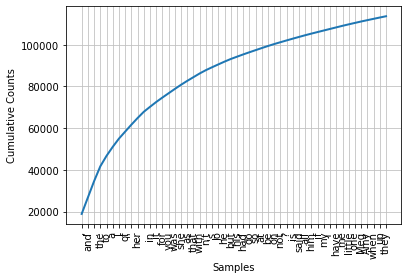

In [135]:
# Please write your Python code in this cell and execute it.
fdist.plot(50, cumulative=True);

Maintenant, construisez une liste avec la longueur de chaque _token_ du texte (la liste aura donc autant de nombres que de tokens).  Créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (cette fois-ci _non_-cumulative) des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

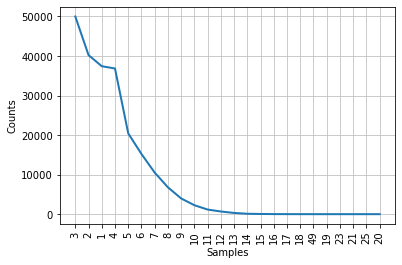

In [136]:
# Please write your Python code in this cell and execute it.
wordLengthList=list(map(lambda w : len(w),directWordTokenize))
wordLengthFreq=nltk.FreqDist(wordLengthList)
wordLengthFreq.plot(50,cumulative=False)

**Approximation de la Loi de Zipf.**

Générez la liste des fréquences des mots de votre texte par ordre décroissant (sans les mots, seulement les valeurs des fréquences).  Limitez cette liste à *N&nbsp;* valeurs (par exemple *N&nbsp;* = 100).  Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang, c'est-à-dire le rang (1, 2, 3, ..., *N&nbsp;*) sur l'axe *x&nbsp;* et la fréquence sur l'axe *y&nbsp;*.

Ajoutez une deuxième courbe (dans la même commande `plot`) de la forme *y&nbsp;* = *a&nbsp;* / (*x&nbsp;* + *b&nbsp;*) en choississant des valeurs de *a&nbsp;* et *b&nbsp;* qui vous rapprochent autant que possible de la courbe des fréquences.

[18890, 7865, 7841, 7113, 5016, 4316, 3955, 3351, 3331, 3187, 2999, 2375, 2320, 2142, 2062, 2061, 2004, 1875, 1778, 1770, 1592, 1394, 1352, 1337, 1257, 1096, 1091, 1041, 1016, 1013, 984, 934, 874, 865, 852, 827, 817, 778, 751, 748, 746, 744, 743, 705, 688, 680, 640, 634, 629, 608, 600, 594, 570, 565, 530, 525, 518, 517, 505, 479, 479, 473, 470, 458, 457, 455, 453, 439, 437, 436, 428, 424, 403, 392, 370, 362, 360, 356, 354, 351, 349, 348, 346, 346, 344, 342, 341, 340, 339, 334, 326, 322, 317, 315, 310, 303, 302, 291, 284, 281]


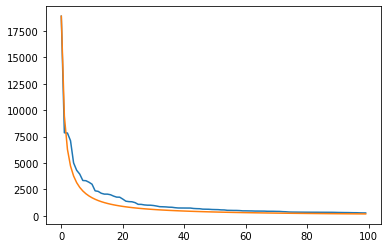

In [88]:
# Please write your Python code in this cell and execute it.
freqs= list(map(lambda f:f[1],fdist.most_common(100) ))
y=list(map(lambda x: 18890/(x+1),range(0,100)))
matplotlib.pyplot.plot(range(0,100),freqs,range(0,100),y)
print(freqs)

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1c et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 